In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
import pandas as pd

df = pd.read_csv("/content/postings.csv", sep=None, engine='python', on_bad_lines='skip', encoding='utf-8')
print("✅ Data loaded successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

✅ Data loaded successfully!
Rows: 3562, Columns: 31


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713398e+12,NaN,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,30.0,Full-time,NaN,1.712858e+12,NaN,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,ComplexOnsiteApply,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713278e+12,NaN,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712896e+12,NaN,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,ComplexOnsiteApply,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,60000.0,Full-time,NaN,1.713452e+12,NaN,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,ComplexOnsiteApply,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [7]:
print('\n--- Columns ---')
print(list(df.columns))
print('\n--- Head ---')
print(df.head().T)


--- Columns ---
['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'med_salary', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code', 'fips']

--- Head ---
                                                                            0  \
job_id                                                                 921716   
company_name                                            Corcoran Sawyer Smith   
title                                                   Marketing Coordinator   
description                 Job descriptionA leading real estate firm in N...   
max_salary                                                               20.0   
pay_

In [8]:
missing = df.isna().mean().sort_values(ascending=False)
print('\n--- Missing fraction (top 20) ---')
print(missing.head(20))


--- Missing fraction (top 20) ---
skills_desc                   0.995227
closed_time                   0.992981
med_salary                    0.941044
remote_allowed                0.866648
max_salary                    0.711117
min_salary                    0.711117
applies                       0.667883
currency                      0.652162
compensation_type             0.652162
pay_period                    0.652162
normalized_salary             0.652162
posting_domain                0.529197
application_url               0.491016
formatted_experience_level    0.394441
fips                          0.243683
zip_code                      0.191185
company_name                  0.036216
company_id                    0.035935
views                         0.004492
work_type                     0.000281
dtype: float64


In [1]:
print("\nTop 10 Job Titles:")
print(df['title'].value_counts().head(10))

print("\nTop 10 Companies Hiring:")
print(df['company_name'].value_counts().head(10))

print("\nTop 10 Job Locations:")
print(df['location'].value_counts().head(10))


Top 10 Job Titles:


NameError: name 'df' is not defined

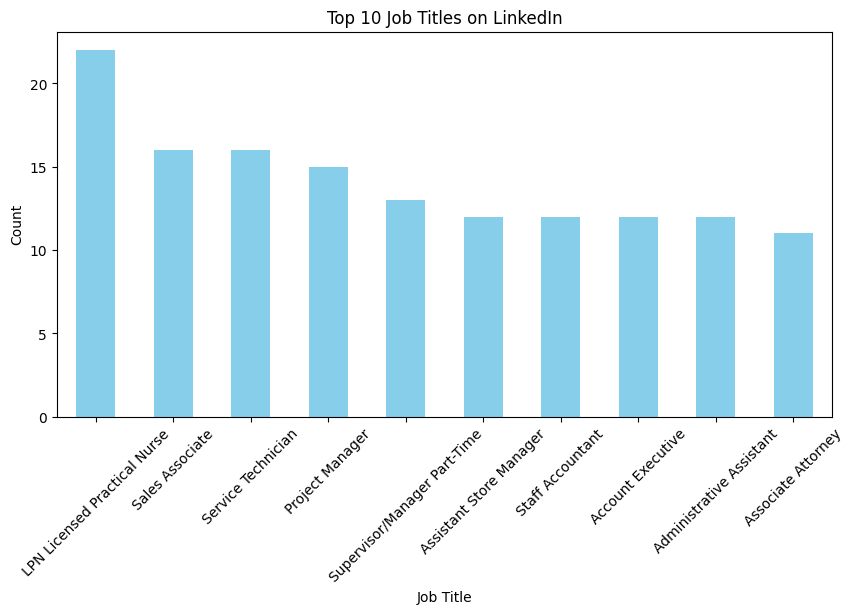

In [9]:
plt.figure(figsize=(10,5))
df['title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Job Titles on LinkedIn")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

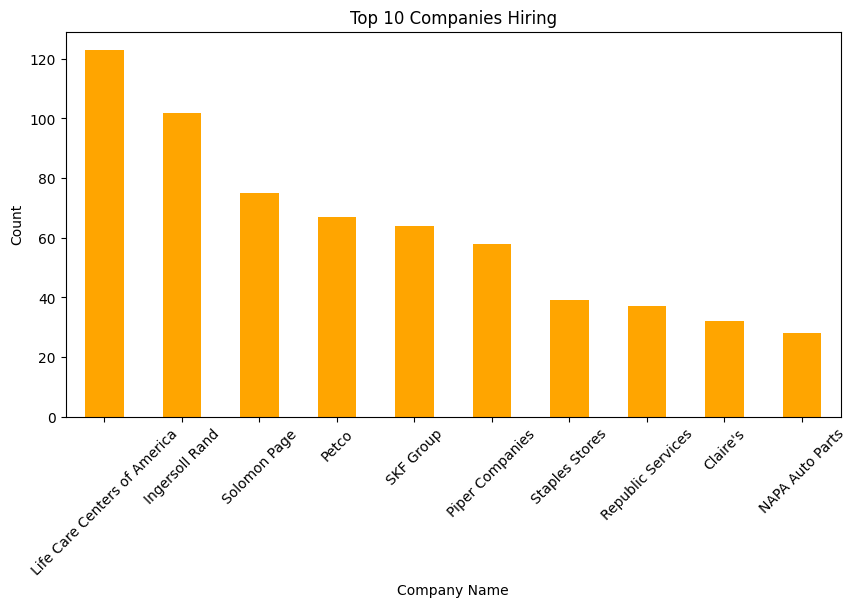

In [10]:
plt.figure(figsize=(10,5))
df['company_name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Companies Hiring")
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

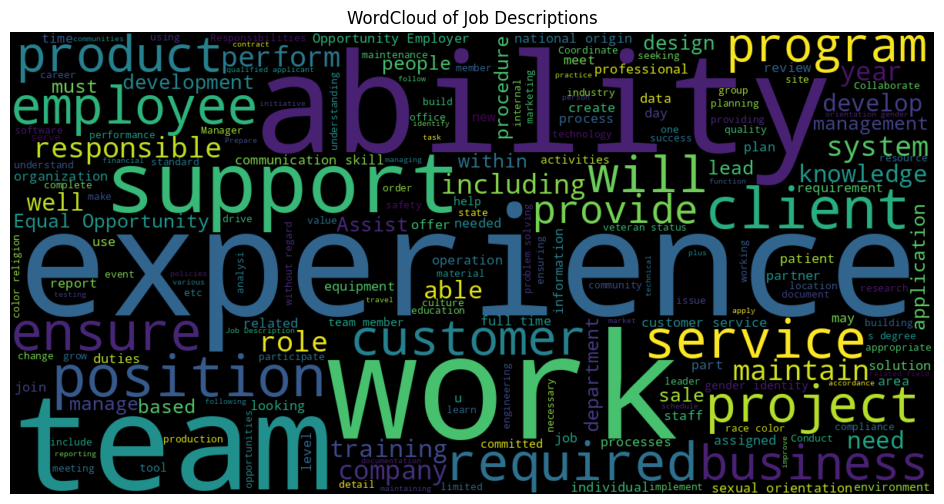

In [12]:
if 'description' in df.columns:
    text = " ".join(df['description'].dropna().astype(str))
    wordcloud = WordCloud(width=1200, height=600, background_color='black').generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud of Job Descriptions")
    plt.show()

In [13]:
df.to_csv("linkedin_cleaned.csv", index=False)
print("\n💾 Cleaned dataset saved as linkedin_cleaned.csv")


💾 Cleaned dataset saved as linkedin_cleaned.csv


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
if 'description' in df.columns:
    df['description'] = df['description'].astype(str).str.lower()
else:
    print("⚠️ No 'description' column found!")


In [17]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def fast_clean(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = text.split()  # much faster than nltk.word_tokenize
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens


In [19]:
df['tokens'] = df['description'].astype(str).apply(fast_clean)

In [20]:
common_skills = [
    'python', 'excel', 'sql', 'power bi', 'tableau', 'r', 'machine learning', 'data analysis',
    'communication', 'leadership', 'project management', 'aws', 'azure', 'google cloud',
    'javascript', 'html', 'css', 'react', 'java', 'c++', 'spark', 'hadoop', 'linux'
]

In [21]:
skill_counts = {skill: 0 for skill in common_skills}

In [22]:
for desc in df['description']:
    for skill in common_skills:
        if skill in desc:
            skill_counts[skill] += 1

/tmp/ipython-input-3304585640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_series.values, y=skill_series.index, palette='viridis')


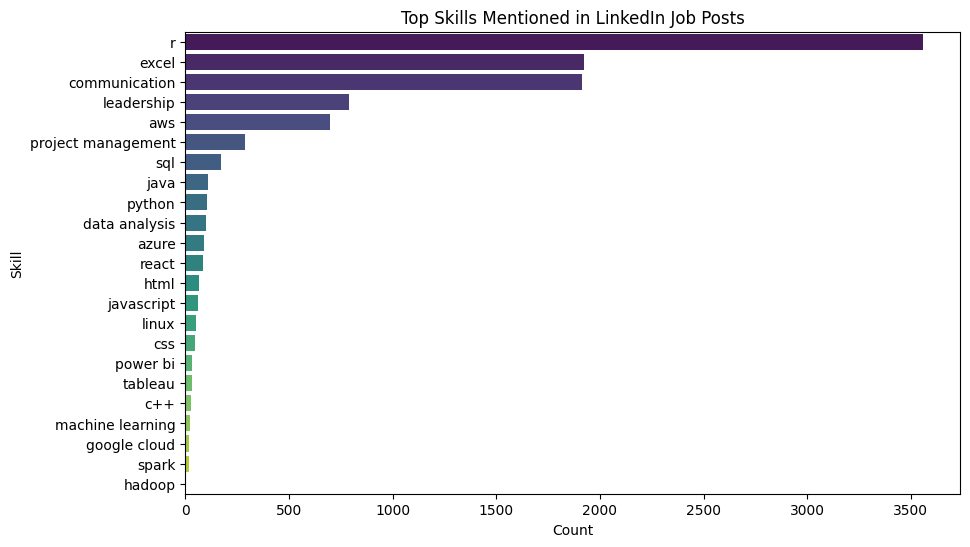

In [23]:
skill_series = pd.Series(skill_counts).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=skill_series.values, y=skill_series.index, palette='viridis')
plt.title("Top Skills Mentioned in LinkedIn Job Posts")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()


In [24]:
all_tokens = [token for tokens in df['tokens'] for token in tokens]
freq_dist = Counter(all_tokens)
common_words = freq_dist.most_common(30)

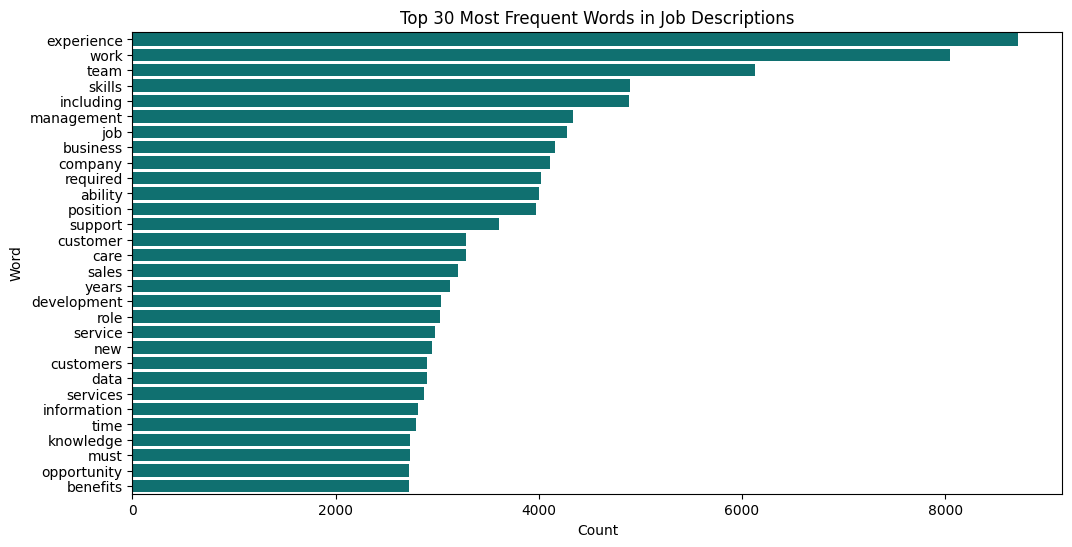

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=[count for (word, count) in common_words],
            y=[word for (word, count) in common_words], color='teal')
plt.title("Top 30 Most Frequent Words in Job Descriptions")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [26]:
skills_text = " ".join(all_tokens)
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(skills_text)

In [27]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [29]:
import nltk
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# Common skills dictionary (you can expand this)
skills_list = [
    "python", "sql", "excel", "tableau", "power bi", "aws", "azure",
    "machine learning", "deep learning", "statistics", "communication",
    "project management", "javascript", "html", "css", "react",
    "data analysis", "data visualization", "tensorflow", "pandas",
    "numpy", "leadership", "problem solving", "r", "java"
]

# Convert to lowercase
skills_list = [s.lower() for s in skills_list]

def extract_skills(text):
    if pd.isna(text):
        return []
    text = text.lower()
    found = [skill for skill in skills_list if skill in text]
    return found

df["extracted_skills"] = df["description"].apply(extract_skills)

print("Sample extracted skills:")
print(df["extracted_skills"].head())


Sample extracted skills:
0                          [r]
1    [excel, communication, r]
2                          [r]
3    [excel, communication, r]
4                          [r]
Name: extracted_skills, dtype: object


In [30]:
skill_counts = Counter()

for skills in df["extracted_skills"]:
    skill_counts.update(skills)

top_skills = skill_counts.most_common(20)

print("\nTop 20 Most In-Demand Skills:")
for skill, count in top_skills:
    print(f"{skill}: {count}")


Top 20 Most In-Demand Skills:
r: 3560
excel: 1924
communication: 1913
leadership: 792
aws: 697
project management: 289
problem solving: 173
sql: 172
java: 109
python: 107
data analysis: 101
azure: 88
react: 87
html: 65
statistics: 62
javascript: 60
css: 45
power bi: 32
tableau: 31
data visualization: 27


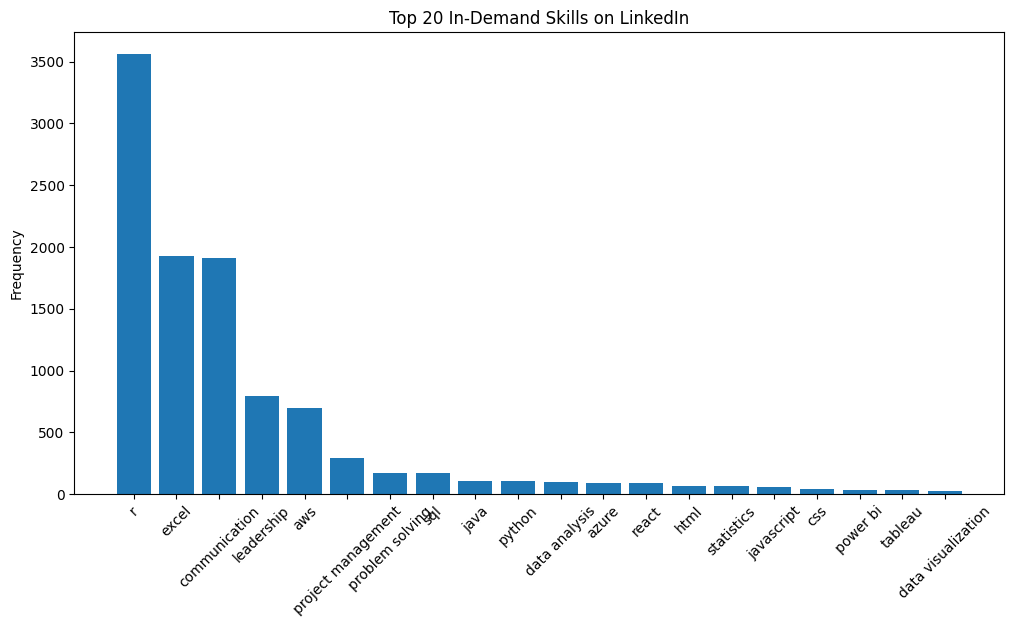

In [31]:
skills, counts = zip(*top_skills)

plt.figure(figsize=(12,6))
plt.bar(skills, counts)
plt.title("Top 20 In-Demand Skills on LinkedIn")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
punct = set(string.punctuation)

def clean_text(text):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w not in stop_words and w not in punct]
    return tokens

df["tokens"] = df["description"].apply(clean_text)

word_counter = Counter()

for tokens in df["tokens"]:
    word_counter.update(tokens)

print("\nMost Common Words in Job Descriptions:")
print(word_counter.most_common(30))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most Common Words in Job Descriptions:
[('experience', 8817), ('work', 8094), ('’', 7116), ('team', 6142), ('including', 4907), ('skills', 4835), ('company', 4457), ('management', 4348), ('job', 4301), ('business', 4171), ('ability', 4056), ('position', 4029), ('required', 4016), ('support', 3627), ('customer', 3409), ('care', 3355), ('sales', 3211), ('years', 3095), ('role', 3051), ('development', 3033), ('service', 2976), ('new', 2950), ('data', 2890), ('services', 2849), ('benefits', 2841), ('information', 2804), ('must', 2785), ('time', 2785), ('customers', 2778), ('knowledge', 2756)]
